In [1]:
%matplotlib notebook

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2.pkl')
df

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[ 1.26076304 -5.11876687  1.26075093] Hf, [ 1...   
1721  [[  1.2262443  -10.12402918  -3.43749088] Hf, ...   
1722  [[1.39997305 0.20795941 1.85144277] Hf, [1.451...   
1723  [[-8.97250742 -0.20890362  1.50328354] Hf, [-8...   
1724  [[1.26076659 9.90848891 1.27892142] Hf, [1.260...   

                                name  
0        Ag_HfO2_cat_3.125_222_m.cif  
1        Ag_HfO2_cat_3.125_222_o.cif  
2      Ag_HfO2_cat_3.125_222_p-o.cif  
3        Ag_HfO2_cat_3.125_222_t.cif  
4         Ag_HfO2_cat_6.25_122_m.cif  
...                              ...  
1720    Zr_HfO2_inter_6.25_212_t.cif  
1721    Zr_HfO2_inter_6.25_221_m.cif  
1722    Zr_HfO2_inter_6.25_221_o.cif  
1723  Zr_HfO2_inter_6.25_221_p-o.cif  
1724    Zr_HfO2_inter_6.25_221_t.cif  

[1725 rows x 2 columns]

In [35]:
xrd = XRDPowderPattern(two_theta_range=(5, 60))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[ 1.26076304 -5.11876687  1.26075093] Hf, [ 1...   
1721  [[  1.2262443  -10.12402918  -3.43749088] Hf, ...   
1722  [[1.39997305 0.20795941 1.85144277] Hf, [1.451...   
1723  [[-8.97250742 -0.20890362  1.50328354] Hf, [-8...   
1724  [[1.26076659 9.90848891 1.27892142] Hf, [1.260...   

                                name          xrd_0          xrd_1  \
0        Ag_HfO2_cat_3.125_222_m.cif  1.922885e-124  3.662136e-106   
1        Ag_HfO2_cat_3.125_222_o.cif  3.833496e-120  2.186820e-102   
2      Ag_HfO2_cat_3.125_222_p-o.cif  4.614158e-144  6.228116e-123   
3        Ag_HfO2_cat_3.125_222_t.cif   0.000000e+00   0.000000e+00   
4         Ag_HfO2_cat_6.25_122_m.cif   3.685323e-13   1.215938e-08   
...                              ...            ...            ...   
1720    Zr_HfO2_inter_6.25_212_t.cif   0.000000e+00   0.000000e+00   
1721    Zr_HfO2_inter_6.25_221_m.cif  2.157189e-123  3.921250e-105   
1722    Zr_HfO2_inter_6.25_221_o.cif   1.628877e-14   1.055123e-09   
1723  Zr_HfO2_inter_6.25_221_p-o.cif   5.637057e-15   8.154305e-10   
1724    Zr_HfO2_inter_6.25_221_t.cif   1.052662e-19   2.655485e-12   

              xrd_2         xrd_3         xrd_4         xrd_5         xrd_6  \
0      2.274709e-89  4.608160e-74  3.044665e-60  6.560875e-48  4.610990e-37   
1      4.377218e-86  3.074328e-71  7.576510e-58  6.551718e-46  1.987962e-35   
2     1.627338e-103  8.231053e-86  8.059163e-70  1.527500e-55  5.604402e-43   
3      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4      1.336709e-05  4.896124e-04  5.975271e-04  2.429700e-05  3.291830e-08   
...             ...           ...           ...           ...           ...   
1720   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1721   2.264441e-88  4.154300e-73  2.421224e-59  4.483036e-47  2.636998e-36   
1722   2.353980e-06  1.808785e-04  4.786917e-04  4.363244e-05  1.369771e-07   
1723   3.094216e-06  3.079948e-04  8.042024e-04  5.508285e-05  9.896843e-08   
1724   3.598342e-07  2.619174e-04  1.024070e-03  2.150794e-05  2.426449e-09   

             xrd_7  ...    xrd_46    xrd_47    xrd_48        xrd_49  \
0     1.056908e-27  ...  0.055240  0.027132  0.002927  1.539337e-03   
1     2.116548e-26  ...  0.075043  0.011835  0.001790  1.217813e-02   
2     3.980468e-32  ...  0.102211  0.051378  0.005594  1.090626e-02   
3     0.000000e+00  ...  0.192912  0.062303  0.002428  6.835819e-07   
4     1.485977e-12  ...  0.053768  0.027731  0.003637  3.828243e-03   
...            ...  ...       ...       ...       ...           ...   
1720  0.000000e+00  ...  0.230393  0.019318  0.000017  9.694532e-11   
1721  4.927738e-27  ...  0.054545  0.010417  0.000261  1.452075e-03   
1722  1.481054e-11  ...  0.050209  0.004052  0.004118  1.054985e-02   
1723  4.664510e-12  ...  0.092145  0.024087  0.001631  2.736708e-03   
1724  1.470439e-15  ...  0.225528  0.019317  0.000017  9.988899e-11   

            xrd_50        xrd_51        xrd_52        xrd_53        xrd_54  \
0     2.148806e-02  3.620248e-02  3.856953e-02  1.656177e-02  2.202758e-02   
1     7.475838e-03  1.704685e-02  4.701839e-02  3.450198e-02  1.086083e-02   
2     6.304034e-03  1.095069e-02  5.834865e-03  4.191295e-04  2.241709e-02   
3     8.922782e-13  5.368799e-21  1.488995e-31  1.903481e-44  1.121612e-59   
4     2.363149e-02  3.321684e-02  3.445653e-02  1.697082e-02  2.246895e-02   
...            ...           ...           ...           ...           ...   
1720  3.008175e-18  4.998223e-28  4.432960e-40  2.097766e-54  5.296409e-71   
1721  2.752624e-02  4.467599e-02  2.812541e-02  1.953147e-02  1.280853

In [38]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [41]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [ ]:
labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
labels_true

In [43]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

xrd_0          xrd_1          xrd_2         xrd_3         xrd_4  \
0     1.922885e-124  3.662136e-106   2.274709e-89  4.608160e-74  3.044665e-60   
1     3.833496e-120  2.186820e-102   4.377218e-86  3.074328e-71  7.576510e-58   
2     4.614158e-144  6.228116e-123  1.627338e-103  8.231053e-86  8.059163e-70   
3      0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
4      3.685323e-13   1.215938e-08   1.336709e-05  4.896124e-04  5.975271e-04   
...             ...            ...            ...           ...           ...   
1720   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
1721  2.157189e-123  3.921250e-105   2.264441e-88  4.154300e-73  2.421224e-59   
1722   1.628877e-14   1.055123e-09   2.353980e-06  1.808785e-04  4.786917e-04   
1723   5.637057e-15   8.154305e-10   3.094216e-06  3.079948e-04  8.042024e-04   
1724   1.052662e-19   2.655485e-12   3.598342e-07  2.619174e-04  1.024070e-03   

             xrd_5         xrd_6         xrd_7         xrd_8          xrd_9  \
0     6.560875e-48  4.610990e-37  1.056908e-27  7.901144e-20   1.926430e-13   
1     6.551718e-46  1.987962e-35  2.116548e-26  7.907060e-19   1.036499e-12   
2     1.527500e-55  5.604402e-43  3.980468e-32  5.472626e-23   1.456512e-15   
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  9.881313e-322   
4     2.429700e-05  3.291830e-08  1.485977e-12  2.396561e-18   3.260115e-13   
...            ...           ...           ...           ...            ...   
1720  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  8.191786e-312   
1721  4.483036e-47  2.636998e-36  4.927738e-27  2.925403e-19   5.517268e-13   
1722  4.363244e-05  1.369771e-07  1.481054e-11  5.698369e-17   2.015100e-12   
1723  5.508285e-05  9.896843e-08  4.664510e-12  5.814138e-18   1.329418e-13   
1724  2.150794e-05  2.426449e-09  1.470439e-15  4.786591e-24   8.369684e-35   

      ...    xrd_46    xrd_47    xrd_48        xrd_49        xrd_50  \
0     ...  0.055240  0.027132  0.002927  1.539337e-03  2.148806e-02   
1     ...  0.075043  0.011835  0.001790  1.217813e-02  7.475838e-03   
2     ...  0.102211  0.051378  0.005594  1.090626e-02  6.304034e-03   
3     ...  0.192912  0.062303  0.002428  6.835819e-07  8.922782e-13   
4     ...  0.053768  0.027731  0.003637  3.828243e-03  2.363149e-02   
...   ...       ...       ...       ...           ...           ...   
1720  ...  0.230393  0.019318  0.000017  9.694532e-11  3.008175e-18   
1721  ...  0.054545  0.010417  0.000261  1.452075e-03  2.752624e-02   
1722  ...  0.050209  0.004052  0.004118  1.054985e-02  1.464532e-02   
1723  ...  0.092145  0.024087  0.001631  2.736708e-03  9.266588e-04   
1724  ...  0.225528  0.019317  0.000017  9.988899e-11  3.165657e-18   

            xrd_51        xrd_52        xrd_53        xrd_54        xrd_55  
0     3.620248e-02  3.856953e-02  1.656177e-02  2.202758e-02  4.907713e-03  
1     1.704685e-02  4.701839e-02  3.450198e-02  1.086083e-02  1.359166e-02  
2     1.095069e-02  5.834865e-03  4.191295e-04  2.241709e-02  2.862530e-02  
3     5.368799e-21  1.488995e-31  1.903481e-44  1.121612e-59  3.046321e-77  
4     3.321684e-02  3.445653e-02  1.697082e-02  2.246895e-02  5.644233e-03  
...            ...           ...           ...           ...           ...  
1720  4.998223e-28  4.432960e-40  2.097766e-54  5.296409e-71  7.134511e-90  
1721  4.467599e-02  2.812541e-02  1.953147e-02  1.280853e-02  1.011006e-02  
1722  3.429327e-02  3.956431e-02  2.234222e-02  1.562678e-02  1.100528e-02  
1723  2.672073e-03  4.030183e-03  1.146990e-03  2.654477e-02  5.130519e-02  
1724  5.408048e-28  4.965037e-40  2.448694e-54  6.487144e-71  9.231589e-90  

[1725 rows x 56 columns]

In [44]:
# not good
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[6.53930059e-115, 2.25437237e-100, 4.87895166e-086, ...,
        3.20620124e-001, 3.69851964e-001, 8.33727082e-002],
       [1.30368608e-110, 1.34618365e-096, 9.38855629e-083, ...,
        6.67925579e-001, 1.82357725e-001, 2.30896391e-001],
       [1.56917178e-134, 3.83396281e-117, 3.49042505e-100, ...,
        8.11394921e-003, 3.76391997e-001, 4.86289452e-001],
       ...,
       [5.53944436e-005, 6.49522666e-004, 5.04897640e-003, ...,
        4.32524208e-001, 2.62379945e-001, 1.86958782e-001],
       [1.91703684e-005, 5.01970463e-004, 6.63668575e-003, ...,
        2.22046394e-002, 4.45697546e-001, 8.71577611e-001],
       [3.57986673e-010, 1.63468887e-006, 7.71796959e-004, ...,
        4.69654403e-053, 1.08618110e-069, 1.56711836e-088]])

In [45]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


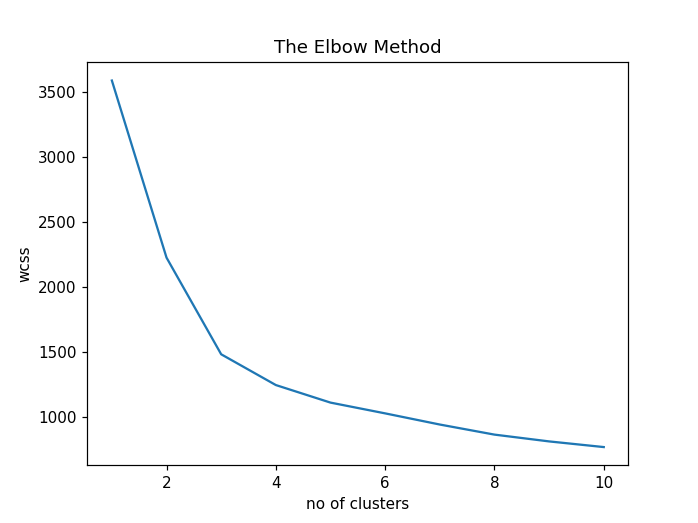

In [46]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

TypeError: 'numpy.ndarray' object is not callable

<IPython.core.display.Javascript object>


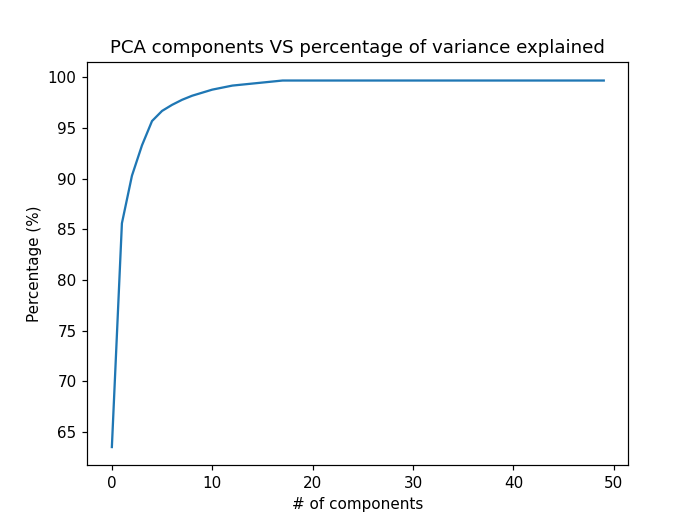

In [48]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [49]:
pca = PCA(n_components=3)
PCA = pca.fit_transform(X)

TypeError: 'numpy.ndarray' object is not callable

In [19]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [22]:
from sklearn import metrics
metrics.silhouette_score(X, PCA_labels, metric='l2')

0.44214835991395096

In [23]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
dfPCA.columns = ['x1','x2','x3','cluster', 'labels']
dfPCA

x1        x2        x3  cluster  labels
0    -0.217382  0.059399 -0.000306        1       0
1     0.007298 -0.093740 -0.067653        2       2
2     0.154856  0.064249 -0.037506        0       1
3     0.248798  0.157768 -0.024555        4       3
4    -0.210136  0.059853 -0.001583        1       0
...        ...       ...       ...      ...     ...
3445  0.138165 -0.059172  0.097899        3       3
3446 -0.212389  0.069000  0.036476        1       0
3447 -0.089734 -0.108521 -0.046079        2       2
3448  0.132102 -0.054912  0.096948        3       4
3449  0.138160 -0.059184  0.097902        3       3

[3450 rows x 5 columns]

<IPython.core.display.Javascript object>


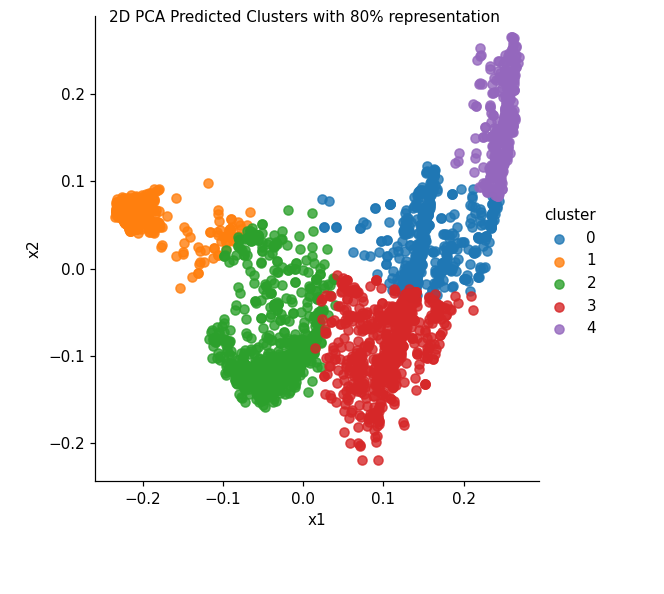

Text(0.5, 0.98, '2D PCA Predicted Clusters with 80% representation')

In [24]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 80% representation", fontsize=10)

<IPython.core.display.Javascript object>


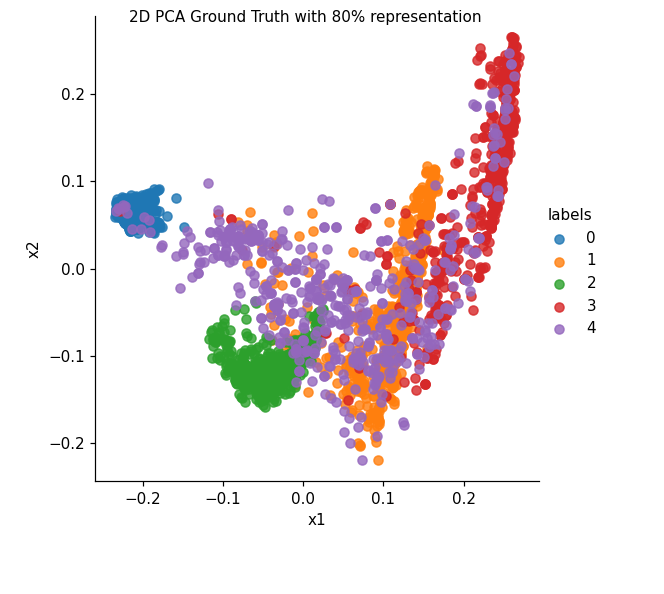

Text(0.5, 0.98, '2D PCA Ground Truth with 80% representation')

In [25]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 80% representation", fontsize=10)

In [26]:

dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA

x1        x2        x3  cluster   labels
0    -0.217382  0.059399 -0.000306        1        m
1     0.007298 -0.093740 -0.067653        2        o
2     0.154856  0.064249 -0.037506        0      p-o
3     0.248798  0.157768 -0.024555        4        t
4    -0.210136  0.059853 -0.001583        1        m
...        ...       ...       ...      ...      ...
3445  0.138165 -0.059172  0.097899        3        t
3446 -0.212389  0.069000  0.036476        1        m
3447 -0.089734 -0.108521 -0.046079        2        o
3448  0.132102 -0.054912  0.096948        3  unknown
3449  0.138160 -0.059184  0.097902        3        t

[3450 rows x 5 columns]

In [27]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [28]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [74]:
from sklearn.cluster import OPTICS
X_optics = dfPCA[['x1', 'x2', 'x3']]

# min_samples = list(range(50, 60))
# for i in min_samples:
    # print('min_samples is: ' + str(i))
    
clustering = OPTICS(min_samples=120).fit(X_optics)
labels_optics = clustering.labels_
dfPCA['labels_optics'] = labels_optics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
n_noise_ = list(labels_optics).count(-1)
unique, counts = np.unique(labels_optics, return_counts=True)
print(dict(zip(unique, counts)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_optics, labels_optics))


{-1: 803, 0: 386, 1: 206, 2: 330}
Estimated number of clusters: 3
Estimated number of noise points: 803
Silhouette Coefficient: 0.388


In [75]:
dfPCA_optics = dfPCA[['x1', 'x2', 'x3','labels_optics']]

fig = px.scatter_3d(
    dfPCA_optics, x='x1', y='x2', z='x3', color=dfPCA_optics['labels_optics'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction OPTICS'
)
fig.show()

In [ ]:
# Test 